In [1]:
import tarfile
import io
from PIL import Image
from decord import VideoReader

# List of PIL Image objects (assuming you have them loaded)
vr = VideoReader('/data/datasets/ego4d_data/v2/vq2d_clips/001fe47b-c00a-4fc7-9f94-40ede6b009f5.mp4')
images = vr.get_batch(range(0, 10, 2)).asnumpy()
images = [Image.fromarray(image) for image in images]
output_tar_path = './tmp.tar'

# Open a tarfile in write mode
with tarfile.open(output_tar_path, 'w') as tar:
    for idx, image in enumerate(images):
        # Create an in-memory byte stream
        img_bytes = io.BytesIO()

        # Save the image to this byte stream in JPEG format (or PNG, etc.)
        image.save(img_bytes, format='JPEG')

        # Ensure the stream's position is set to the beginning
        img_bytes.seek(0)

        # Create a tarinfo object to add metadata (like filename)
        tarinfo = tarfile.TarInfo(name=f'frame_{1+idx:07d}.jpg')

        # Set the size of the tarinfo object to match the byte stream
        tarinfo.size = img_bytes.getbuffer().nbytes

        # Add the image byte stream to the tar archive
        tar.addfile(tarinfo, fileobj=img_bytes)


In [6]:
# List to store the extracted PIL Images
extracted_images = []

# Open the tar file for reading
with tarfile.open(output_tar_path, 'r') as tar:
    for member in tar.getmembers():
        if member.isfile():  # Check if it's a file
            # Extract the file data as a byte stream
            file = tar.extractfile(member)

            if file is not None:
                # Read the byte stream
                img_bytes = file.read()

                # Load the byte stream into a PIL Image object
                img = Image.open(io.BytesIO(img_bytes))

                # Optionally, you can append this image to a list or process it immediately
                extracted_images.append(img)

# Now you can work with the list of extracted PIL.Image objects


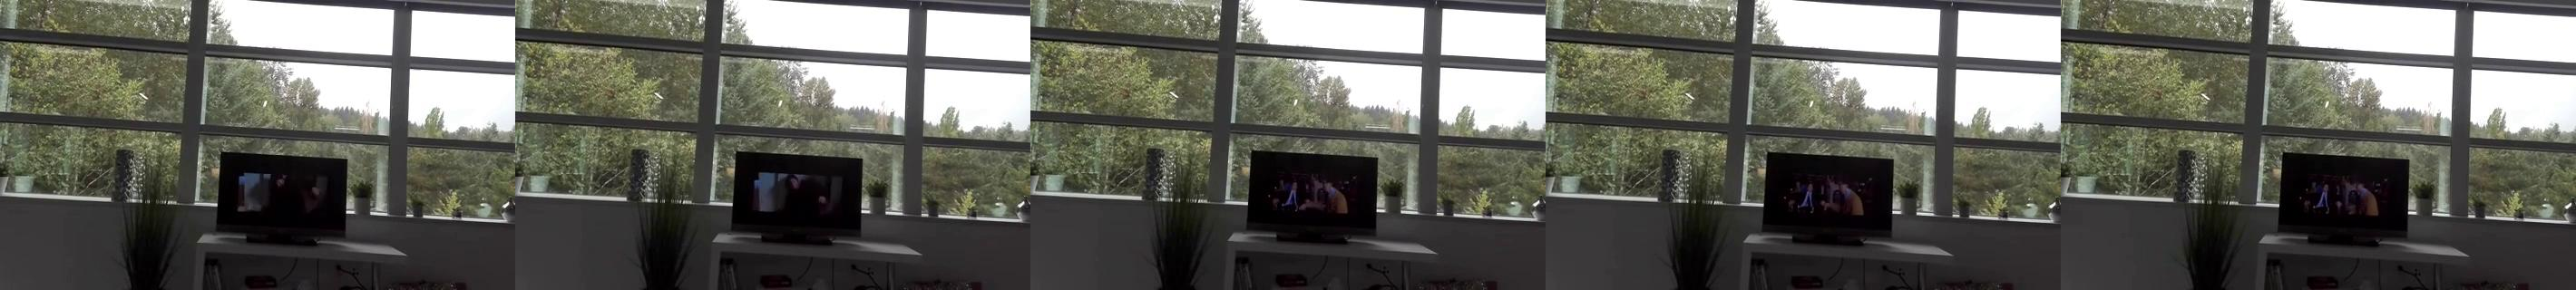

In [10]:
import numpy as np
from einops import rearrange

extracted_images = np.array([np.array(image) for image in extracted_images])
images_flat = rearrange(extracted_images, 'b h w c -> h (b w) c')
Image.fromarray(images_flat)